## Simple returns and log returns

In [326]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [327]:
df = pd.DataFrame(index=[2016, 2017, 2018], data = [100, 50, 95], columns=["Price"])
df

,Price
2016,100
2017,50
2018,95


In [328]:
simplereturns = df.pct_change().dropna()
simplereturns

,Price
2017,-0.5
2018,0.9


In [329]:
simplereturns.mean()

Price    0.2
dtype: float64

### Mean returns are misleading as crazy

In [330]:
logreturns = np.log(df/df.shift(1)).dropna()
logreturns

,Price
2017,-0.693147
2018,0.641854


In [331]:
logreturns.mean()

Price   -0.025647
dtype: float64

In [332]:
100*np.exp(logreturns.mean()*2)

Price    95.0
dtype: float64

In [333]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [334]:
spy = SPY.Close
spy

Date
1993-01-29     43.937500
1993-02-01     44.250000
1993-02-02     44.343750
1993-02-03     44.812500
1993-02-04     45.000000
                 ...    
2023-02-22    398.540009
2023-02-23    400.660004
2023-02-24    396.380005
2023-02-27    397.730011
2023-02-28    396.260010
Name: Close, Length: 7575, dtype: float64

In [335]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-22,398.540009
2023-02-23,400.660004
2023-02-24,396.380005


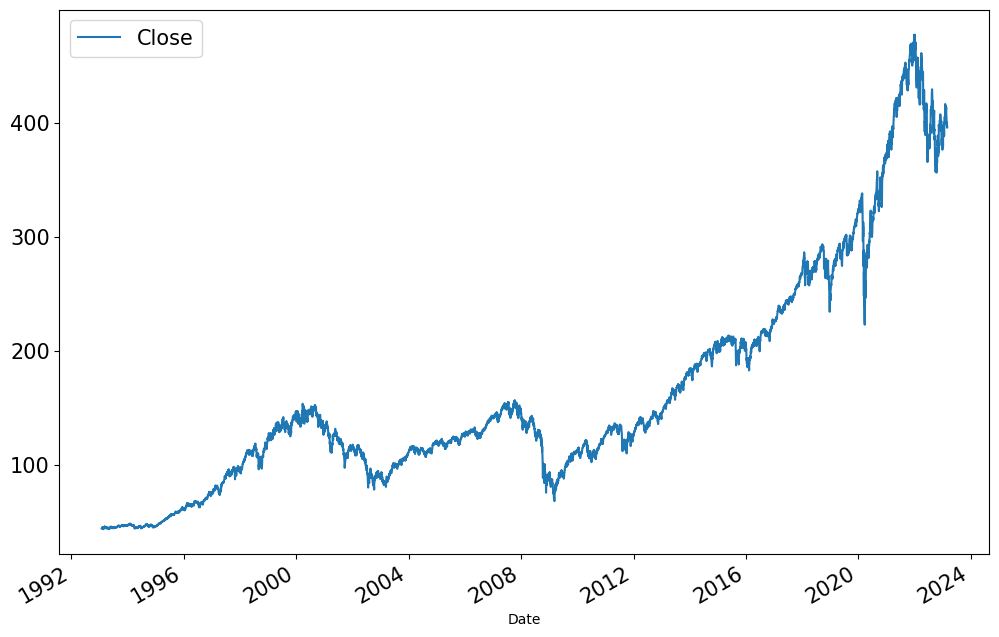

In [336]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [337]:
spy_roll = spy.rolling(window=10)
spy_roll

Rolling [window=10,center=False,axis=0,method=single]

In [338]:
spy_roll = spy_roll.mean()
spy_roll.head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [339]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-22,408.160004
2023-02-23,407.650009
2023-02-24,407.650009


In [340]:
spy.rolling(window=10).max()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2023-02-22,413.980011
2023-02-23,413.980011
2023-02-24,413.980011


In [341]:
spy.rolling(window=10, min_periods=5).min().head(15)

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,43.93750
1993-02-05,43.93750
1993-02-08,43.93750
1993-02-09,43.93750
1993-02-10,43.93750


In [342]:
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-22,398.540009
2023-02-23,400.660004
2023-02-24,396.380005


In [343]:
spy["SMA50"] = spy.rolling(window=50,min_periods=50).mean()
spy

,Close,SMA50
Date,,
1993-01-29,43.937500,NaN
1993-02-01,44.250000,NaN
1993-02-02,44.343750,NaN
1993-02-03,44.812500,NaN
1993-02-04,45.000000,NaN
...,...,...
2023-02-22,398.540009,396.7624
2023-02-23,400.660004,396.9100
2023-02-24,396.380005,396.8586


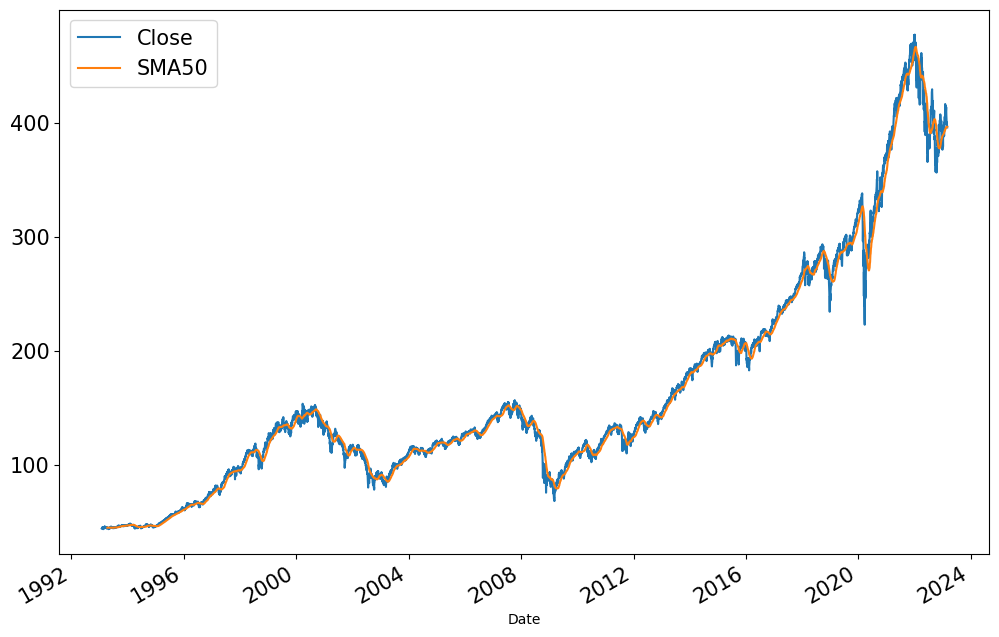

In [344]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [345]:
spy["SMA200"] = spy.Close.rolling(window=200,min_periods=200).mean()
spy

,Close,SMA50,SMA200
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2023-02-22,398.540009,396.7624,393.182750
2023-02-23,400.660004,396.9100,393.129350
2023-02-24,396.380005,396.8586,393.120400


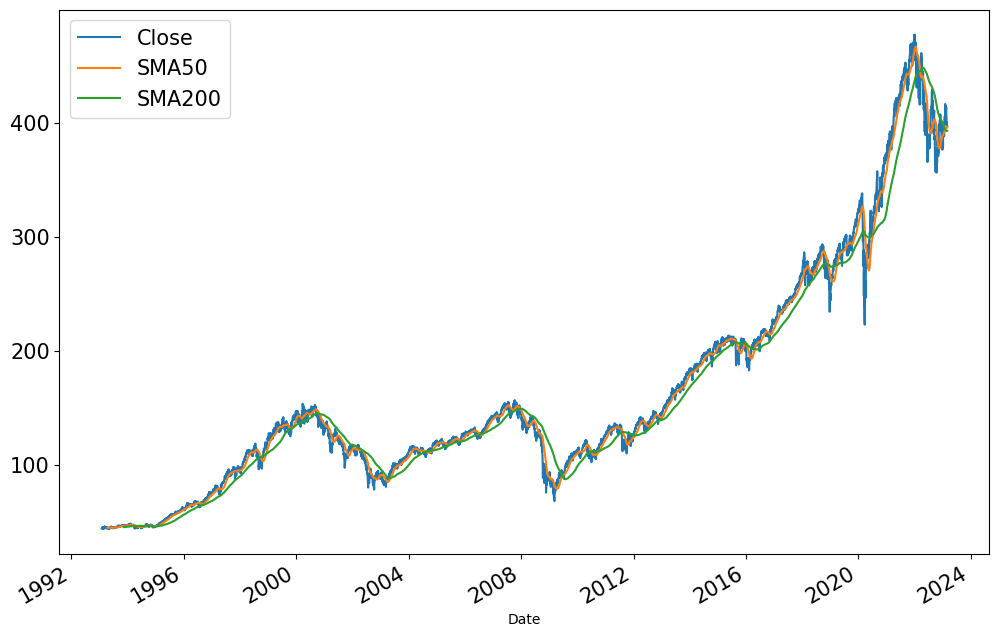

In [346]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

### Exponential moving average (EMA)

In [347]:
spy["EMA100"] = spy.Close.ewm(span=100, min_periods=100).mean()
spy

,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2023-02-22,398.540009,396.7624,393.182750,396.655043
2023-02-23,400.660004,396.9100,393.129350,396.734349
2023-02-24,396.380005,396.8586,393.120400,396.727333


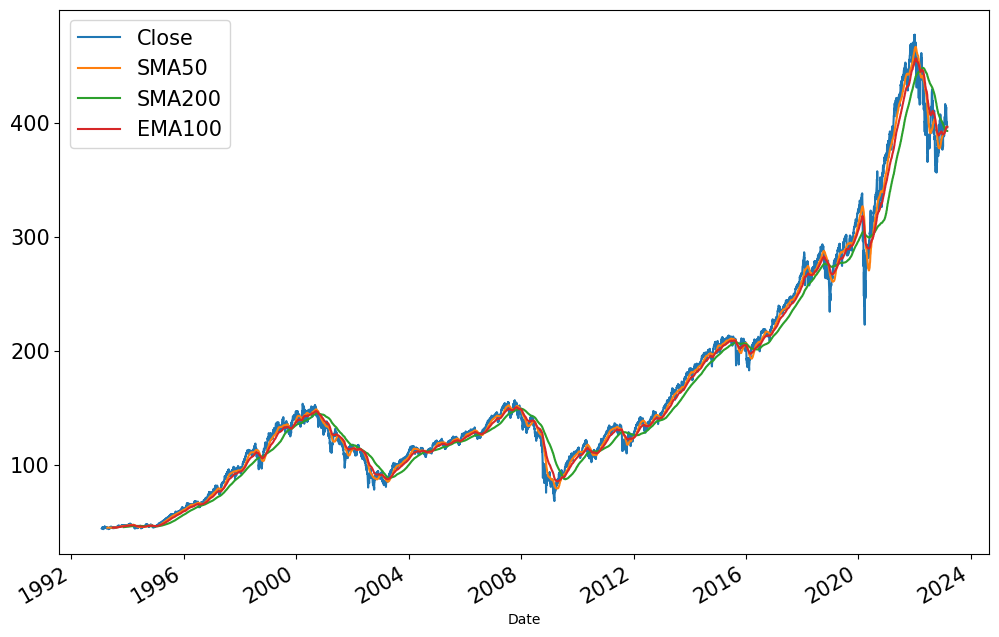

In [348]:
spy.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [349]:
spy["Day"] = spy.index.day_name()
spy

,Close,SMA50,SMA200,EMA100,Day
Date,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday
1993-02-01,44.250000,NaN,NaN,NaN,Monday
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday
1993-02-04,45.000000,NaN,NaN,NaN,Thursday
...,...,...,...,...,...
2023-02-22,398.540009,396.7624,393.182750,396.655043,Wednesday
2023-02-23,400.660004,396.9100,393.129350,396.734349,Thursday
2023-02-24,396.380005,396.8586,393.120400,396.727333,Friday


In [350]:
spy["Quarter"] = spy.index.quarter
spy

,Close,SMA50,SMA200,EMA100,Day,Quarter
Date,,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2023-02-22,398.540009,396.7624,393.182750,396.655043,Wednesday,1
2023-02-23,400.660004,396.9100,393.129350,396.734349,Thursday,1
2023-02-24,396.380005,396.8586,393.120400,396.727333,Friday,1


In [351]:
SPY = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [352]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2023-02-22,398.540009
2023-02-23,400.660004
2023-02-24,396.380005


In [353]:
all_days = pd.date_range(start="2010-12-31", end="2020-01-01", freq = "D")
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [354]:
spy = spy.reindex(all_days)
spy

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,321.079987
2019-12-31,321.859985


In [355]:
spy.fillna(method="ffill")

,Close
2010-12-31,125.750000
2011-01-01,125.750000
2011-01-02,125.750000
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,322.859985
2019-12-29,322.859985
2019-12-30,321.079987
2019-12-31,321.859985


In [356]:
spy.fillna(method="bfill")

,Close
2010-12-31,125.750000
2011-01-01,127.050003
2011-01-02,127.050003
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,321.079987
2019-12-29,321.079987
2019-12-30,321.079987
2019-12-31,321.859985


In [357]:
SPY = yf.download("SPY", interval="1wk")
SPY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218222,1003200
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810122,2234800
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594877,1159800
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.002996,998700
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487265,1024300
...,...,...,...,...,...,...
2023-01-30,402.799988,418.309998,400.279999,412.350006,412.350006,458774900
2023-02-06,409.790009,416.489990,405.010010,408.040009,408.040009,376946400
2023-02-13,408.720001,415.049988,404.049988,407.260010,407.260010,380588700


### Cummaltive returns, Drawdowns etc.

In [358]:
apple = yf.download("AAPL")
apple = apple.Close.to_frame()
apple

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-02-22,148.910004
2023-02-23,149.399994
2023-02-24,146.710007


In [359]:
apple["d_returns"] = np.log(apple.div(apple.shift(1))) # daily returns
apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2023-02-22,148.910004,0.002892
2023-02-23,149.399994,0.003285
2023-02-24,146.710007,-0.018169


In [360]:
apple.dropna(inplace=True)
apple

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2023-02-22,148.910004,0.002892
2023-02-23,149.399994,0.003285
2023-02-24,146.710007,-0.018169


In [361]:
apple.d_returns.sum()

7.04622785442197

In [362]:
np.exp(apple.d_returns.sum())

1148.518183532243

In [363]:
apple["cummreturns"] = apple.d_returns.cumsum().apply(np.exp)
apple

,Close,d_returns,cummreturns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2023-02-22,148.910004,0.002892,1160.205160
2023-02-23,149.399994,0.003285,1164.022830
2023-02-24,146.710007,-0.018169,1143.064285


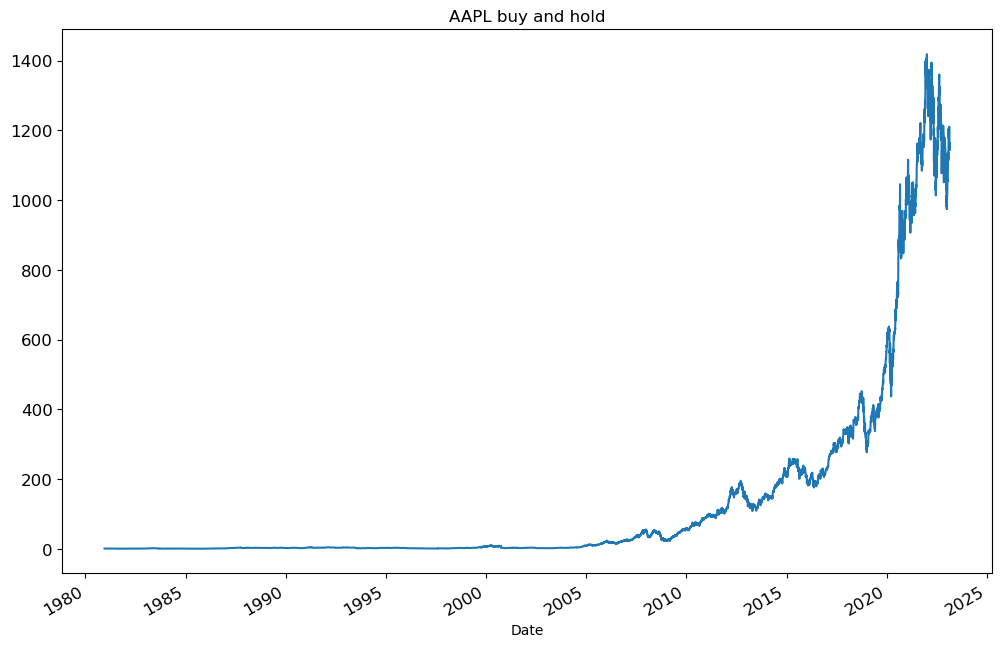

In [364]:
apple.cummreturns.plot(figsize=(12,8), title = "AAPL buy and hold", fontsize=12)
plt.show()

In [365]:
apple.d_returns.mean()*252

0.16686866077571058

In [366]:
apple.d_returns.std()*np.sqrt(252)

0.45523070846144564

#### how to calculate drawdowns

In [367]:
apple["cummmax"] = apple.cummreturns.cummax()
apple

,Close,d_returns,cummreturns,cummmax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2023-02-22,148.910004,0.002892,1160.205160,1418.097708
2023-02-23,149.399994,0.003285,1164.022830,1418.097708
2023-02-24,146.710007,-0.018169,1143.064285,1418.097708


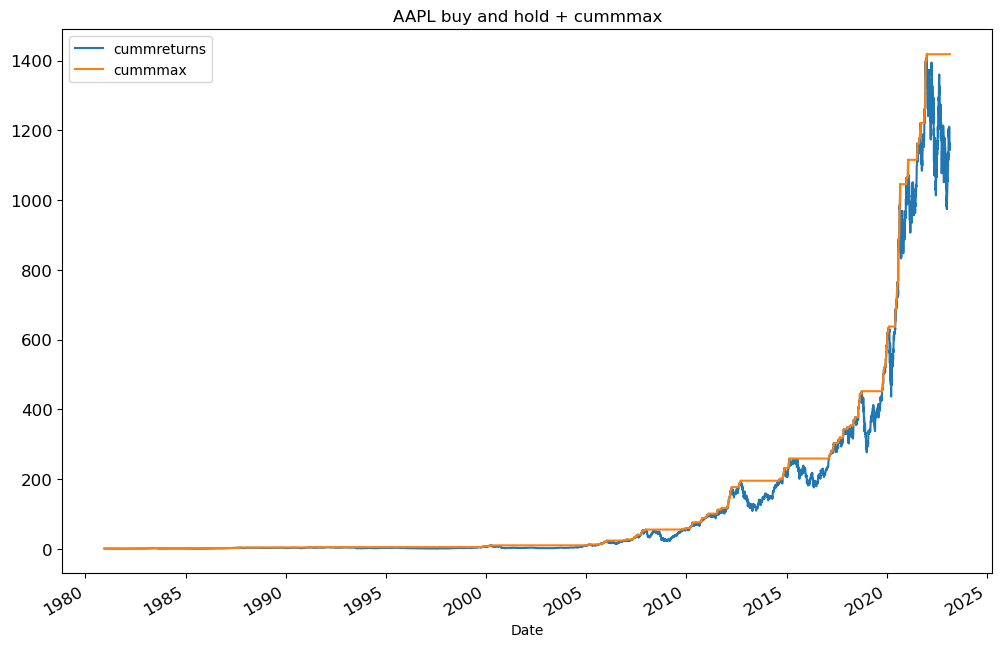

In [368]:
apple[["cummreturns","cummmax"]].plot(figsize=(12,8), title = "AAPL buy and hold + cummmax", fontsize=12)
plt.show()

In [369]:
apple

,Close,d_returns,cummreturns,cummmax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2023-02-22,148.910004,0.002892,1160.205160,1418.097708
2023-02-23,149.399994,0.003285,1164.022830,1418.097708
2023-02-24,146.710007,-0.018169,1143.064285,1418.097708


In [370]:
apple["drawdown"] = apple["cummmax"] - apple["cummreturns"]
apple

,Close,d_returns,cummreturns,cummmax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2023-02-22,148.910004,0.002892,1160.205160,1418.097708,257.892547
2023-02-23,149.399994,0.003285,1164.022830,1418.097708,254.074878
2023-02-24,146.710007,-0.018169,1143.064285,1418.097708,275.033423


In [371]:
apple.drawdown.max()

444.02718404402026

In [372]:
apple.drawdown.idxmax()

Timestamp('2023-01-05 00:00:00')

In [373]:
apple.loc[(apple.index=="2023-01-05")]

,Close,d_returns,cummreturns,cummmax,drawdown
Date,,,,,
2023-01-05,125.019997,-0.010661,974.070524,1418.097708,444.027184


In [374]:
apple.loc[(apple.index<="2023-01-05")]

,Close,d_returns,cummreturns,cummmax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-12-29,129.610001,0.027931,1009.832703,1418.097708,408.265004
2022-12-30,129.929993,0.002466,1012.325863,1418.097708,405.771845
2023-01-03,125.070000,-0.038122,974.460113,1418.097708,443.637594


In [375]:
apple["drawdown%"] = (apple["cummmax"] - apple["cummreturns"]) / apple["cummmax"]
apple

,Close,d_returns,cummreturns,cummmax,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2023-02-22,148.910004,0.002892,1160.205160,1418.097708,257.892547,0.181858
2023-02-23,149.399994,0.003285,1164.022830,1418.097708,254.074878,0.179166
2023-02-24,146.710007,-0.018169,1143.064285,1418.097708,275.033423,0.193945


In [376]:
apple["drawdown%"].max()

0.82216567924191

In [377]:
apple["drawdown%"].idxmax()

Timestamp('1997-12-23 00:00:00')

In [378]:
apple.loc[(apple.index<="1997-12-23")]

,Close,d_returns,cummreturns,cummmax,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
1997-12-17,0.124442,-0.026549,0.969567,5.060882,4.091315,0.808419
1997-12-18,0.123326,-0.009008,0.960872,5.060882,4.100010,0.810137
1997-12-19,0.122210,-0.009090,0.952177,5.060882,4.108705,0.811856


#### SMA Strategy

In [382]:
data = apple.Close.loc[(apple.index>='1991-01-01')]
data = data.to_frame()
data

,Close
Date,
1991-01-02,0.388393
1991-01-03,0.383929
1991-01-04,0.386161
1991-01-07,0.386161
1991-01-08,0.386161
...,...
2023-02-22,148.910004
2023-02-23,149.399994
2023-02-24,146.710007


In [383]:
sma_s = 50
sma_l = 100

In [386]:
data["sma_s"] = data.Close.rolling(sma_s).mean()
data["sma_l"] = data.Close.rolling(sma_l).mean()
data

,Close,sma_s,sma_l
Date,,,
1991-01-02,0.388393,NaN,NaN
1991-01-03,0.383929,NaN,NaN
1991-01-04,0.386161,NaN,NaN
1991-01-07,0.386161,NaN,NaN
1991-01-08,0.386161,NaN,NaN
...,...,...,...
2023-02-22,148.910004,140.373999,142.766199
2023-02-23,149.399994,140.518799,142.835399
2023-02-24,146.710007,140.563199,142.920499


<AxesSubplot: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

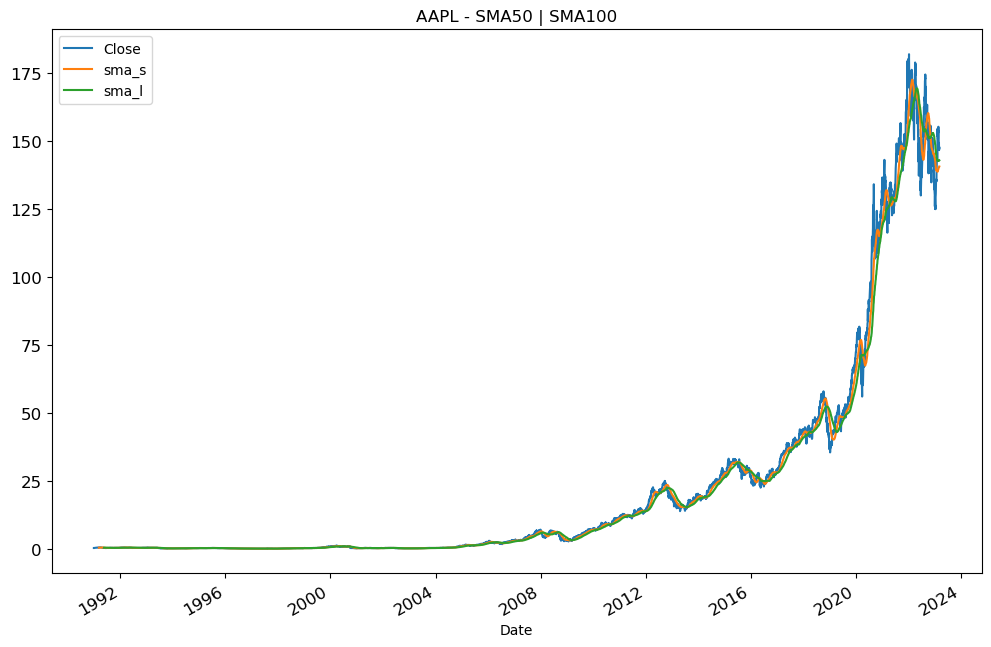

In [387]:
data.plot(figsize=(12,8), title="AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)

<AxesSubplot: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

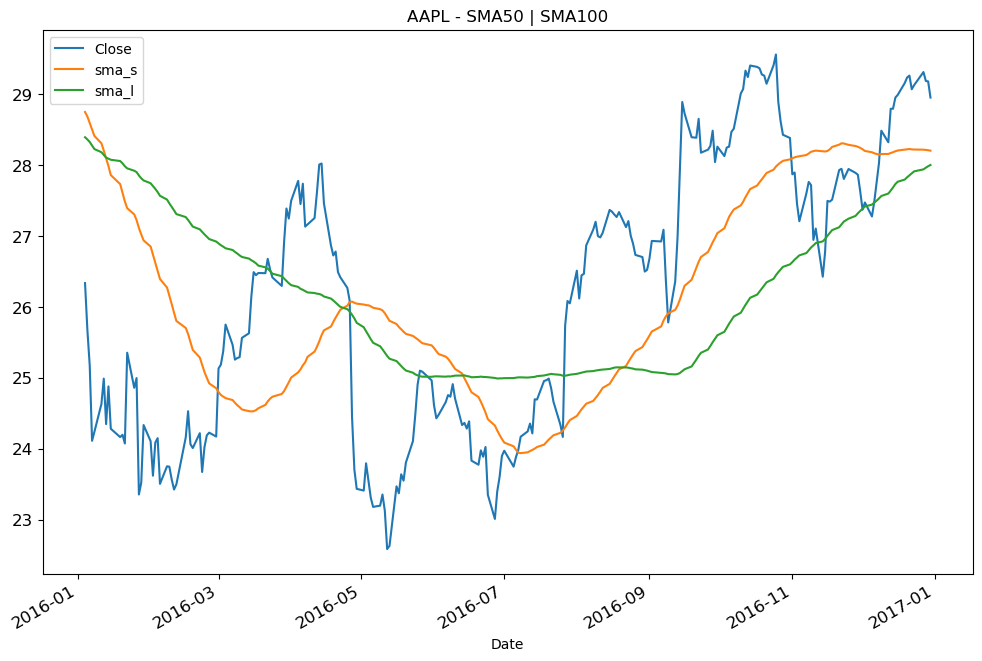

In [388]:
data.loc["2016"].plot(figsize=(12,8), title="AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)

In [389]:
data.dropna(inplace=True)
data

,Close,sma_s,sma_l
Date,,,
1991-05-23,0.402902,0.534420,0.513326
1991-05-24,0.409598,0.530960,0.513538
1991-05-28,0.410714,0.527344,0.513806
1991-05-29,0.419643,0.523638,0.514141
1991-05-30,0.425223,0.519732,0.514531
...,...,...,...
2023-02-22,148.910004,140.373999,142.766199
2023-02-23,149.399994,140.518799,142.835399
2023-02-24,146.710007,140.563199,142.920499


In [391]:
data["position"] = np.where(data["sma_s"]>data["sma_l"], 1, -1) # 1 = long, -1 = short
data

,Close,sma_s,sma_l,position
Date,,,,
1991-05-23,0.402902,0.534420,0.513326,1
1991-05-24,0.409598,0.530960,0.513538,1
1991-05-28,0.410714,0.527344,0.513806,1
1991-05-29,0.419643,0.523638,0.514141,1
1991-05-30,0.425223,0.519732,0.514531,1
...,...,...,...,...
2023-02-22,148.910004,140.373999,142.766199,-1
2023-02-23,149.399994,140.518799,142.835399,-1
2023-02-24,146.710007,140.563199,142.920499,-1


<AxesSubplot: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

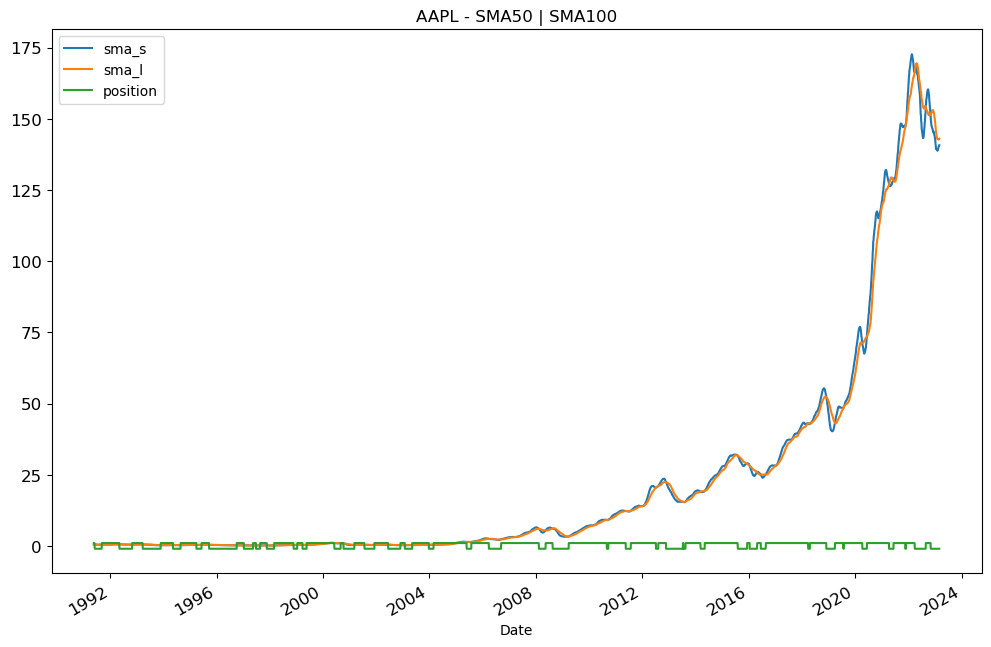

In [392]:
data.loc[:,["sma_s", "sma_l", "position"]].plot(figsize=(12,8), title="AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)

<AxesSubplot: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

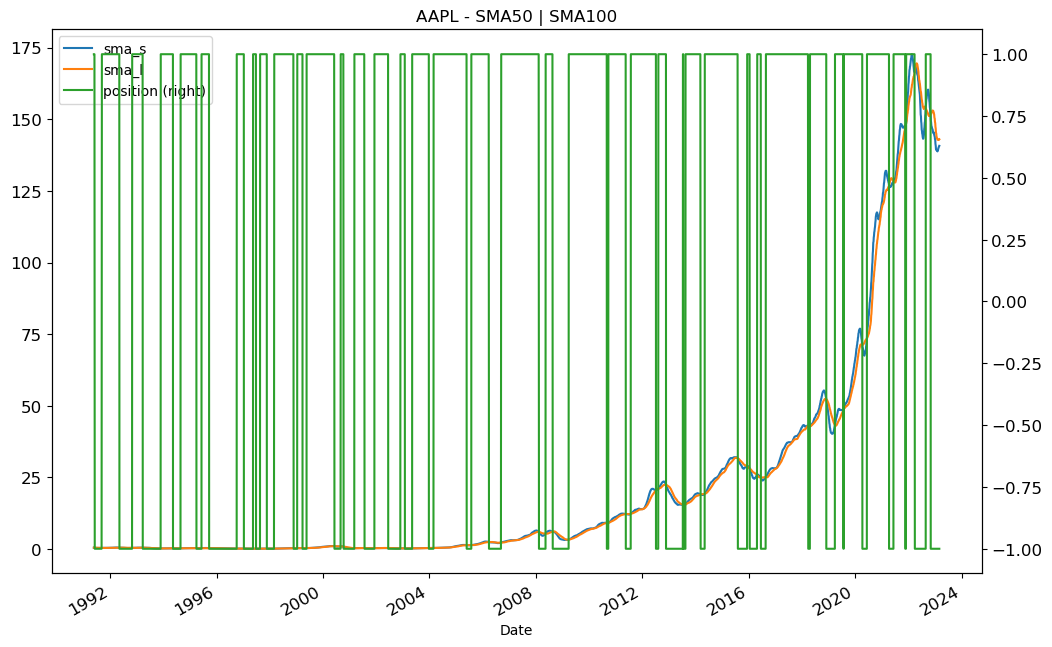

In [393]:
data.loc[:,["sma_s", "sma_l", "position"]].plot(figsize=(12,8), title="AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12, secondary_y="position")

<AxesSubplot: title={'center': 'AAPL - SMA50 | SMA100'}, xlabel='Date'>

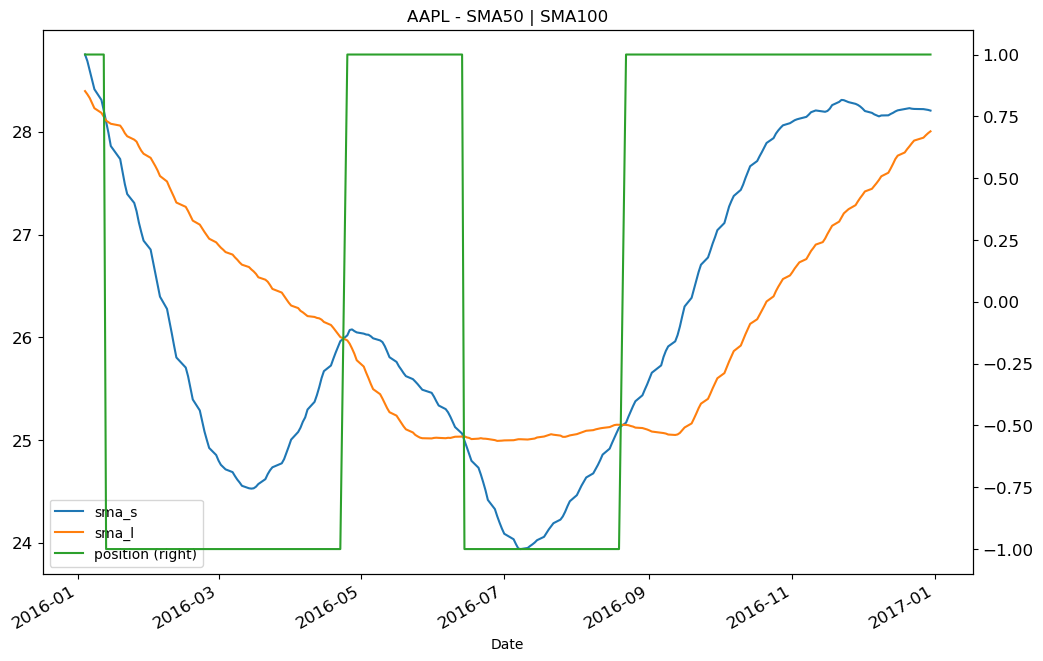

In [394]:
data.loc["2016",["sma_s", "sma_l", "position"]].plot(figsize=(12,8), title="AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12, secondary_y="position")